## Random Forest Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('C:/Users/signi/Downloads/Decision Model/iris.csv')

In [3]:
data.head()

,sepal.length,sepal.width,petal.length,petal.width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data['species_label'], _ = pd.factorize(data['species'])
data['species'].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [6]:
data.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'species',
       'species_label'],
      dtype='object')

In [7]:
features = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
response = ['species_label']
X=data[features].values
y=data[response].values

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [12]:
X_train.shape

(105, 4)

In [43]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0,max_depth=2)

In [64]:
model.fit(X_train,y_train.ravel())

RandomForestClassifier(criterion='entropy', max_depth=2, n_estimators=200,
                       random_state=0)

In [65]:
y_pred=model.predict(X_train)

In [66]:
y_pred

array([1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1,
       2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0,
       2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1,
       2, 0, 1, 2, 2, 0, 1, 1, 2, 1, 0, 0, 0, 2, 1, 2, 0], dtype=int64)

In [67]:
y_predict=model.predict(X_test)

In [68]:
y_predict

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0], dtype=int64)

In [69]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_train,y_pred)

array([[34,  0,  0],
       [ 0, 30,  2],
       [ 0,  1, 38]], dtype=int64)

In [70]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))

Accuracy: 0.9714285714285714


In [71]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.9777777777777777


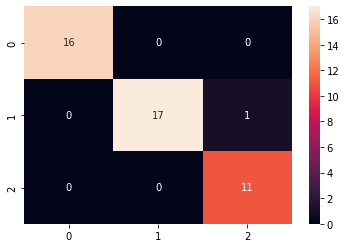

In [72]:
import seaborn as sn
conf_mat = confusion_matrix(y_test,y_predict)
sn.heatmap(conf_mat, annot=True)
plt.show()

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.97      0.94      0.95        32
           2       0.95      0.97      0.96        39

    accuracy                           0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105



In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [57]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
L1 = []
L2 = []
val_range = [2,5,10,15,20,30,50,100]

for i in val_range:
    dtree = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0,max_depth= i)
    dtree.fit(X_train,y_train.ravel())
    y_pred = dtree.predict(X_train)
    y_predict = dtree.predict(X_test)
    L1.append(round(accuracy_score(y_train,y_pred),4))
    L2.append(round(accuracy_score(y_test,y_predict),4))
L_val = pd.concat([pd.Series(val_range),pd.Series(L1)], axis=1)
L1_val = pd.concat([pd.Series(val_range),pd.Series(L2)], axis=1)
L_val.columns = ['Depth','Accuracy']
L1_val.columns = ['Depth','Accuracy']
L_val.sort_values(by="Accuracy", ascending=False, inplace = True)
L1_val.sort_values(by="Accuracy", ascending=False, inplace = True)
print(L_val)
print('------------------------')
print(L1_val)

   Depth  Accuracy
1      5    1.0000
2     10    1.0000
3     15    1.0000
4     20    1.0000
5     30    1.0000
6     50    1.0000
7    100    1.0000
0      2    0.9714
------------------------
   Depth  Accuracy
0      2    0.9778
1      5    0.9778
2     10    0.9778
3     15    0.9778
4     20    0.9778
5     30    0.9778
6     50    0.9778
7    100    0.9778


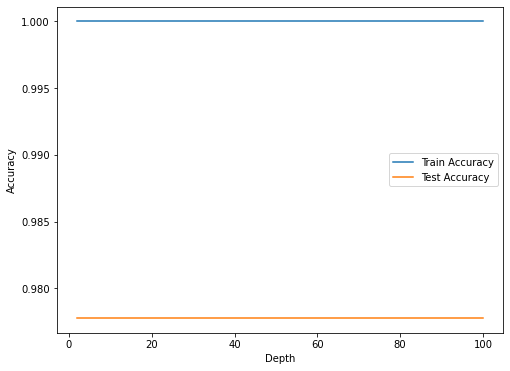

In [78]:

max_depth_list = [2,5,10,15,20,30,50,100]

train = [] # Log training errors for each model
test = [] # Log testing errors for each model

for x in max_depth_list:
    dtree = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0,max_depth= i)
    dtree.fit(X_train,y_train.ravel())
    pred = dtree.predict(X_train)
    predict = dtree.predict(X_test)
    train.append(accuracy_score(y_train,pred))
    test.append(accuracy_score(y_test,predict))

plt.figure(figsize=(8,6))
plt.plot(max_depth_list, train, label='Train Accuracy') # Plot training error over domain
plt.plot(max_depth_list, test, label='Test Accuracy') # Plot testing error over domain
plt.xlabel('Depth') # Label x-axis
plt.ylabel('Accuracy') # Label y-axis
plt.legend() # Show plot labels as legend
plt.show() # Show graph

## based on the plot, Considering the max depth as 5 for best fit.

In [80]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0,max_depth=5)

In [81]:
model.fit(X_train,y_train.ravel())

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=200,
                       random_state=0)

In [82]:
y_pred=model.predict(X_train)

In [83]:
y_predict = model.predict(X_test)

In [84]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))

Accuracy: 1.0


In [85]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.9777777777777777


In [86]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00        39

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

